# 1. Initialise Notebook

### 1.1 Load Libraries

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from scipy import signal
import warnings

# custom imports
from utils.helper_functions import Rereference, Data

# ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Oscillation detection libraries
from fooof import FOOOF, FOOOFGroup

### 1.2 Load Preprocessed Data

In [5]:
df = pd.read_csv('data/subject_07_exp_phase_2_preprocessed.csv')
df.head()

,B 02,B 03,C 02,B' 02,B' 03
0,-6.335006,5.515366,-3.235476,-10.746534,2.720949
1,-6.224205,3.240567,-1.270658,-12.012155,3.596690
2,-7.154152,1.355019,-0.188524,-11.047841,4.099028
3,-7.591131,-0.207910,-0.746439,-8.633868,7.209955
4,-8.607672,-3.271426,-1.465088,-5.929875,9.046964


# 2. Oscillation Detection

### 2.1 Method: FOOOF

link: <br>
https://fooof-tools.github.io/fooof/

citing: <br>
Donoghue T, Haller M, Peterson EJ, Varma P, Sebastian P, Gao R, Noto T, Lara AH, Wallis JD, <br>
Knight RT, Shestyuk A, & Voytek B (2020). Parameterizing neural power spectra into periodic <br>
and aperiodic components. Nature Neuroscience, 23, 1655-1665. <br>
DOI: 10.1038/s41593-020-00744-x

In [7]:
fs = 512

# create epochs

# compute power spectra for each channel
freqs, _t, Pxx = signal.spectrogram(df['B 02'], fs, nfft=512, noverlap=64)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 80 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

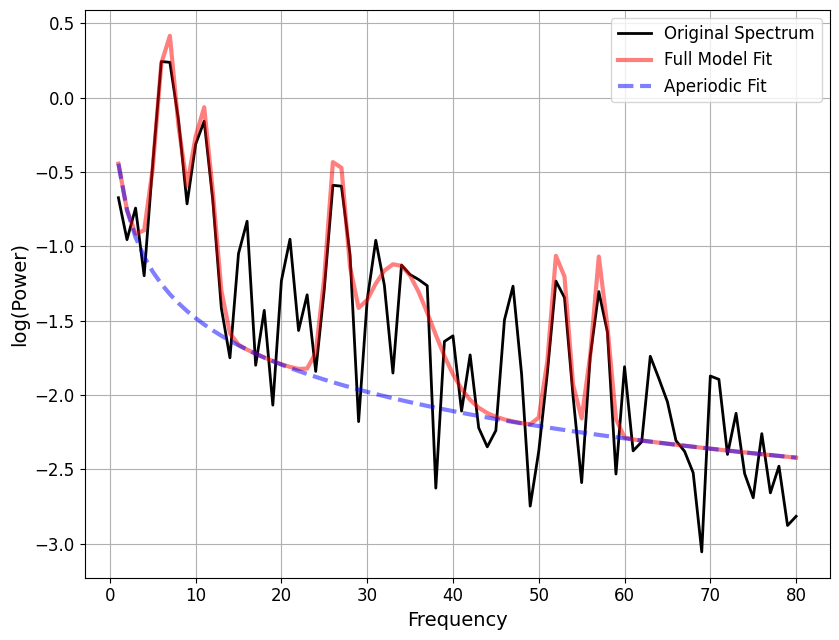

In [18]:
# initialize FOOOF object
fm = FOOOF(peak_width_limits=[1, 8], min_peak_height=0.05, max_n_peaks=6)

# define frequency range for modelling the spectrum
freq_range = [0.5, 256]

# apply model
fm.report(freqs=freqs,
          power_spectrum=Pxx.T[0], 
          freq_range=freq_range)

Running FOOOFGroup across 7102 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                            Number of power spectra in the Group: 7102                            
                                                                                                  
                        The model was run on the frequency range 1 - 80 Hz                        
        

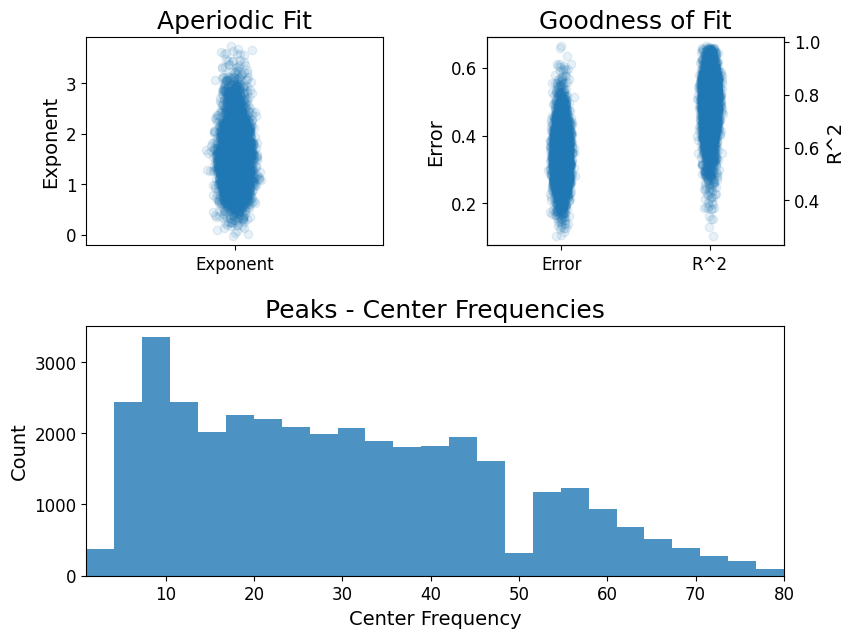

In [28]:
fg = FOOOFGroup(peak_width_limits=[1, 8], min_peak_height=0.05, max_n_peaks=6)

fg.report(freqs=freqs,
          power_spectra=Pxx.T,
          freq_range=freq_range)